В качестве задания на отработку навыков по визуализации данных, мы предлагаем вам провести различные визуализации датасета с большим количеством атрибутов.

Это датасет с информацией о ~15 000 игроков из футбольного симулятора FIFA 18, особо актуальный в год проведения Чемпионата Мира в России. Ознакомиться с ним и скачать можно по ссылке с Kaggle, платформы для соревнований по машинному обучению.

https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

Для выполнения этого задания, вам нужно будет сделать как минимум 4 визуализации для указанного датасета. Вы можете проявить свою фантазию или же использовать предложенные нами варианты визуализаций.

Примеры визуализации:

Гистограмма возраста игроков
Сравнение зависимости зарплаты от возраста игрока. 
Можно найти самые большие команды и сравнить эти зависимости между ними.
Гистограмма распределения одной из статистик по странам — например, средний и максимальный Performance

Review criteria 
Решение должно соответствовать следующим критериям:

1. Минимум две визуализации с помощью matplotlib
2. Минимум две визуализации с помощью Plotly
3. В каждой визуализации должен использоваться как минимум один атрибут, не использованный в других визуализациях
4. Решением к заданию должен быть архив, в котором лежат IPYNB файлы визуализаций. Помимо самого кода визуализации и изображения, в ноутбуке должно присутствовать текстовое описание визуализации.
5. В каждой визуализации должен быть указан заголовок и подписаны оси, если они есть
6. К каждой визуализации должен быть описан вопрос, на который она отвечает, например:
    Гистограмма возраста укажет на доминирующий возраст и особенности распределения
    Гистограмма среднего Performance по странам определит стабильные и надежные страны, а гистограмма максимума — родины особо ярких игроков

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [122]:
df = pd.read_csv('CompleteDataset.csv')

C:\Users\sidio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.



# Визуализация matplotlib № 1

Данный график отражает количественную составляющую игроков по возрасту. Самой большой группой являются 25-летние игроки.

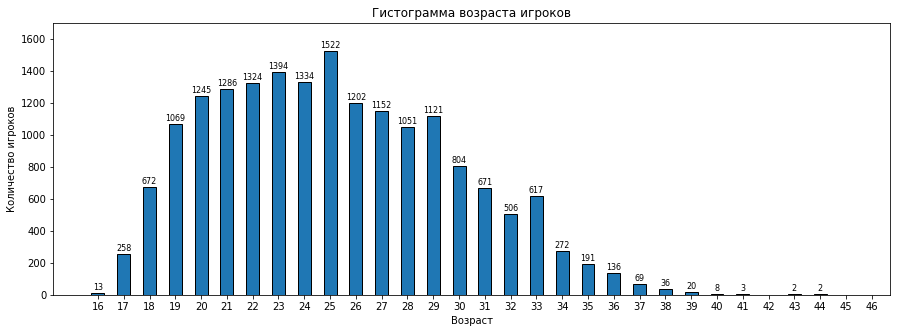

In [137]:
df['Age'].plot.hist(bins=range(16, 47), figsize=(15, 5), edgecolor='black', rwidth=0.5, align='left')
plt.xlabel('Возраст')
plt.xticks(range(16, 47, 1))
plt.ylabel('Количество игроков')
plt.ylim(0, 1700)
plt.title('Гистограмма возраста игроков')
for i, j in zip(df.Age.value_counts().index, df.Age.value_counts()):
    plt.annotate(s=j, xy=(i, j+20), horizontalalignment='center', fontsize=8)
plt.savefig('results_matplotlib_1.png')

# Визуализация matplotlib № 2

Данный график отражает среднее значение потенциального роста общего рейтинга игрока в распределении по возрастным группам.

In [124]:
df['Diff'] = df['Potential'] - df['Overall']

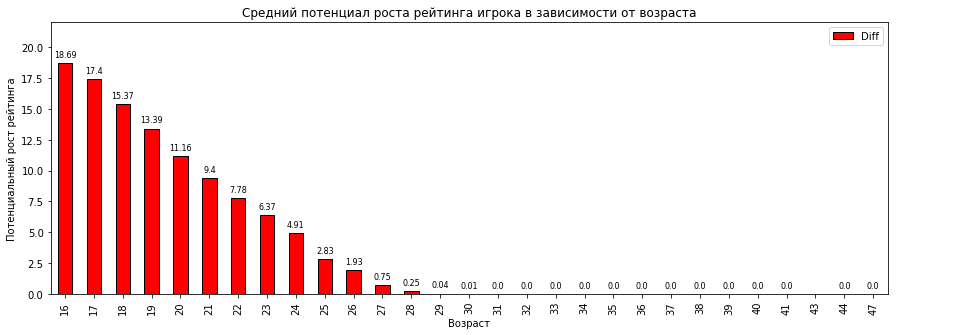

In [139]:
df.groupby('Age').Diff.mean().to_frame().plot.bar(figsize=(15, 5), edgecolor='black', color='red')
plt.ylim(0, 22)
plt.ylabel('Потенциальный рост рейтинга')
plt.xlabel('Возраст')
plt.title('Средний потенциал роста рейтинга игрока в зависимости от возраста')
for i, j in zip(df.groupby('Age').Diff.mean().index, df.groupby('Age').Diff.mean().round(2).to_list()):
    plt.annotate(s=j, xy=(i-16, j+0.5), horizontalalignment='center', fontsize=8)
plt.savefig('results_matplotlib_2.png')

# Визуализация plotly № 1

Данный график отражает средний общий рейтинг игроков в странах из топ-10 рейтинга FIFA по состоянию на 10 декабря 2020 года.
Уругвай и Мексика по этому показателю занимают 2-ое и 3-ье место соответственно, несмотря на то, что они замыкают
вершину рейтинга стран.
https://www.fifa.com/fifa-world-ranking/ranking-table/men/

In [126]:
import plotly.offline as offline
from plotly.graph_objs import *
offline.init_notebook_mode()

In [136]:
top10_countries = ['Belgium', 'France', 'Brazil', 'England', 'Portugal', 
                 'Spain', 'Argentina', 'Uruguay', 'Mexico', 'Italy']
data2 = df[df.Nationality.isin(top10_countries)]

trace1 = Bar(x=top10_countries,
             y=data2.groupby('Nationality').Overall.mean().round(4),
             marker=dict(color=data2.groupby('Nationality').Overall.mean().round(4),
                         showscale=True))

data = Data([trace1])
offline.iplot(data)

# Визуализация plotly № 2

Данный график показывает среднее значение заработной платы российских игроков в распределении по клубам, в которых они играют.

In [130]:
df['WWK'] = df['Wage'].apply(lambda x: int(x.replace('€', '').replace('K', '')) * 1000) # Wage в int

In [131]:
data3 = df[df['Nationality'] == 'Russia'].groupby('Club')

trace2 = Bar(x=data3.Club.count().index.to_list(), 
             y=data3.WWK.mean().round(2),
             marker=dict(color=data3.WWK.mean().round(2), showscale=True))

data4 = Data([trace2])
offline.iplot(data4)